In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 1.

Построим график заданной в условии функции:

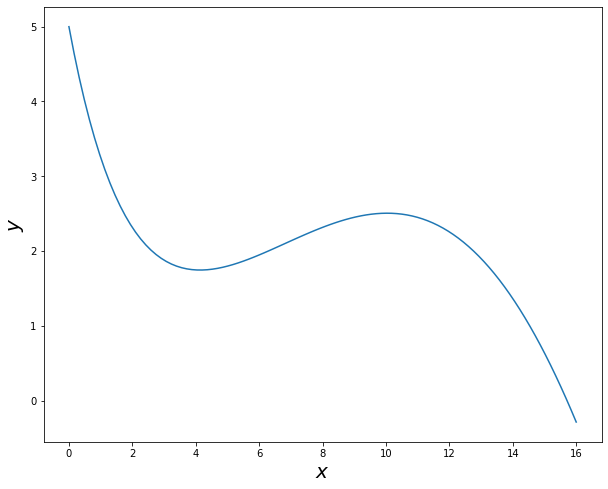

In [4]:
x = np.linspace(0, 16, 100)

def f(x):
    return (np.sin(x/5))*np.exp(x/10)+5*np.exp(-x/2)

plt.figure(figsize=(10,8))
plt.plot(x, f(x))
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.show()

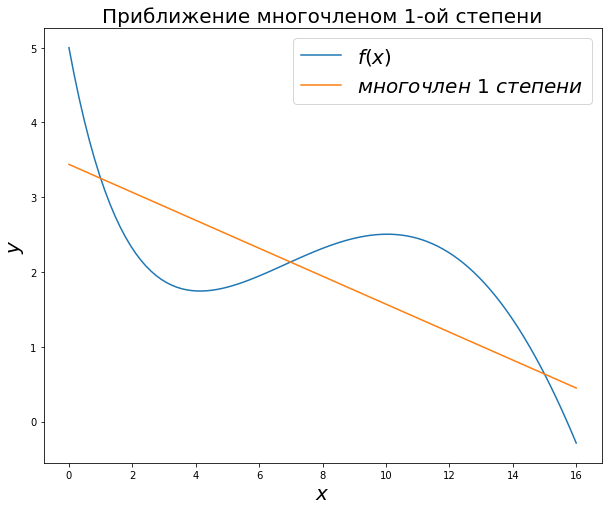

In [5]:
# приближение многочленом первой степени: w0+w1*x = f(x)
a = np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])
sol = np.linalg.solve(a, b)

x = np.linspace(0, 16, 100)
def y1(x):
    return sol[0] + sol[1]*x
plt.figure(figsize=(10,8))
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, y1(x), label=r'$многочлен$ $1$ $степени$')

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'Приближение многочленом 1-ой степени', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

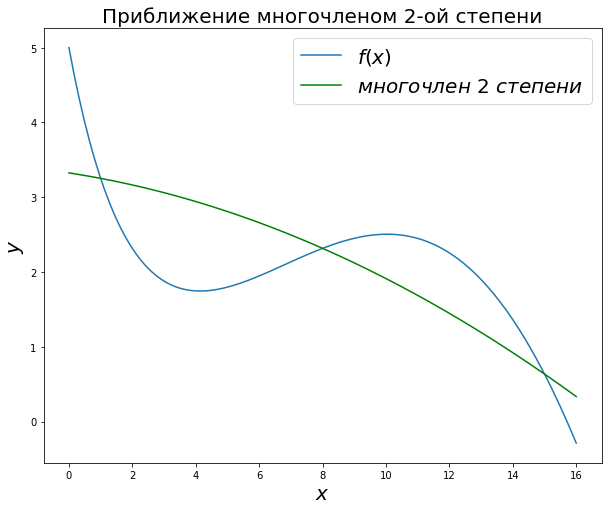

In [6]:
# приближение многочленом второй степени: w0 + w1*x + w2*x^2 = f(x)
a = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b = np.array([f(1), f(8), f(15)])
sol = np.linalg.solve(a, b)

x = np.linspace(0, 16, 100)
def y2(x):
    return sol[0] + sol[1]*x + sol[2]*x**2
plt.figure(figsize=(10,8))
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, y2(x), color='g', label=r'$многочлен$ $2$ $степени$')

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'Приближение многочленом 2-ой степени', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

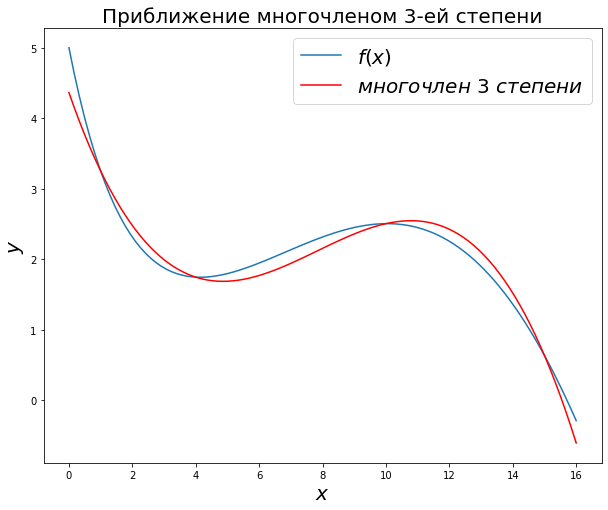

In [7]:
# приближение многочленом 3 степени: w0 + w1*x + w2*x^2 + w3*x^3 = f(x)
a = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b = np.array([f(1), f(4), f(10), f(15)])
sol = np.linalg.solve(a, b) # коэффициенты многочлена - это и есть sol[0],sol[1],sol[2],sol[3]

x = np.linspace(0, 16, 100)
def y3(x):
    return sol[0] + sol[1]*x + sol[2]*x**2 + sol[3]*x**3
plt.figure(figsize=(10,8))
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, y3(x), color='r', label=r'$многочлен$ $3$ $степени$')

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'Приближение многочленом 3-ей степени', fontsize=20)
plt.legend(fontsize=20, loc=0)
plt.show()

Как мы видим, многочлен третьей степени w0 + w1*x + w2*x^2 + w3*x^3 достаточно хорошо приближает функцию f(x)

## Задача 2.
Найти количество позиций, для которых элементы в обоих векторах ненулевые. Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент.

In [8]:
# количество позиций, для которых элементы в обоих векторах ненулевые
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])

not_zero_x = np.where(x != 0)
not_zero_y = np.where(y != 0) 

not_zero = np.intersect1d(not_zero_x, not_zero_y)
print(len(not_zero))

2


In [9]:
# Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])

eq = np.where(x == y)
zero_x = np.where(x == 0)
res = np.intersect1d(eq, zero_x)
print(len(x) - len(res))

6


## Задача 3.
В векторе x надо повторить каждый элемент N = 3 раз подряд.

In [10]:
x = np.array([1, 2 ,0])
res = np.repeat(x, 3)
print(res)

[1 1 1 2 2 2 0 0 0]


## Задача 4.
В векторе x надо найти максимальный элемент среди тех, перед которыми стоит ноль.

In [11]:
x = np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])
zero = np.where(x == 0)
print (x[1:][zero[:-1]].max())

11


## Задача 5.
В векторе x надо заполнить каждый нулевой элемент предыдущим ненулевым значением.

In [12]:
x = np.array([8, 0, 0, 1, 0, 0, 0, -17.5, 0])

In [13]:
not_zero_x = np.where(x != 0)[0]
a = np.array(x, dtype=bool)
smart_sum = np.cumsum(np.array(x, dtype=bool))

In [14]:
res = np.where(smart_sum, x[not_zero_x[smart_sum-1]], 0)
print(res)

[  8.    8.    8.    1.    1.    1.    1.  -17.5 -17.5]


## Задача 6.
Надо вычислить приближённое значение функции f(x) = ln(1 + x) в точке x0 с помощью разложения в ряд Тейлора N-го порядка в окрестности нуля:

In [21]:
n = np.arange(1, N)
tail = ((-1)**(n+1))*x**n
taylor = np.sum(tail)

In [23]:
x = 0.5
N = 100
print(taylor)

0.333984375


## Задача 7.
Дана матрица X «объекты-признаки» размера m x n: число строк m — это количество объектов, а число столбцов n — количество признаков. Каждая строка представляет собой описание объекта выборки в виде набора значений его признаков. Каждый же столбец содержит значения определённого признака на всех объектах выборки.

Надо найти выборочное среднее и ковариационную матрицу выборки X, не пользуясь специальными numpy функциями mean и cov.

In [24]:
x = np.array([[175, 4], [20, 2], [25, 8]])
x
# m = 3
# n = 2

array([[175,   4],
       [ 20,   2],
       [ 25,   8]])

In [25]:
# выборочное среднее
mean_x = 1/3 * np.sum(x, axis=0) # в общем случае 1/m
print('средний рост: ', mean_x[0].round(2),'см;', 'среднее число по кол-ву конечностей: ',  mean_x[1].round(2), 'шт') 

средний рост:  73.33 см; среднее число по кол-ву конечностей:  4.67 шт


In [31]:
print('матрица ковариаций: ')
print(x.T @ x)

матрица ковариаций: 
[[31650   940]
 [  940    84]]
